In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [416]:
sal_data=pd.read_csv('Dataset09-Employee-salary-prediction.csv')
sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [417]:
sal_data.shape

(375, 6)

In [418]:
sal_data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [419]:
sal_data.columns=['Age','Gender','Degree','Job_Title','Experience_year','Salary']

In [420]:
sal_data.head()

,Age,Gender,Degree,Job_Title,Experience_year,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [421]:
sal_data.dtypes

Age                float64
Gender              object
Degree              object
Job_Title           object
Experience_year    float64
Salary             float64
dtype: object

In [422]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              373 non-null    float64
 1   Gender           373 non-null    object 
 2   Degree           373 non-null    object 
 3   Job_Title        373 non-null    object 
 4   Experience_year  373 non-null    float64
 5   Salary           373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [423]:
sal_data[sal_data.duplicated()]

,Age,Gender,Degree,Job_Title,Experience_year,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [424]:
sal_data.duplicated().sum()

50

In [425]:
sal_data=sal_data.drop_duplicates(keep='first')
sal_data.shape

(325, 6)

In [426]:
sal_data.isnull().sum()

Age                1
Gender             1
Degree             1
Job_Title          1
Experience_year    1
Salary             1
dtype: int64

In [427]:
sal_data.dropna(how='any',inplace=True)

In [428]:
sal_data.shape

(324, 6)

In [429]:
sal_data.sample(5)

,Age,Gender,Degree,Job_Title,Experience_year,Salary
47,45.0,Female,Master's,Director of Marketing,16.0,180000.0
185,43.0,Male,Bachelor's,Senior IT Project Manager,14.0,130000.0
327,32.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0
4,52.0,Male,Master's,Director,20.0,200000.0
219,40.0,Female,Bachelor's,Senior Sales Representative,12.0,100000.0


In [430]:
sal_data.describe()

,Age,Experience_year,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [431]:
cor=sal_data[['Age','Experience_year','Salary']].corr()
cor

,Age,Experience_year,Salary
Age,1.000000,0.979192,0.916543
Experience_year,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


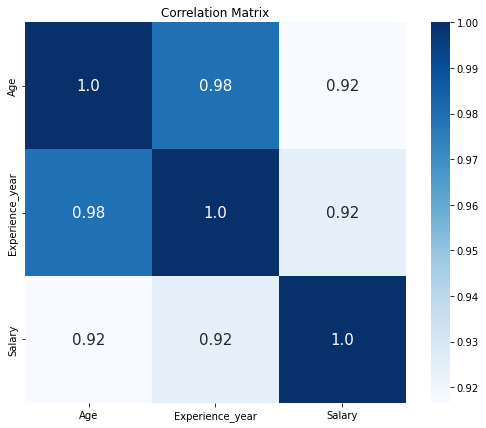

In [432]:
plt.figure(figsize=(9,7))
sns.heatmap(cor,annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='.2',cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [433]:
sal_data.groupby('Gender').mean(numeric_only=True)

,Age,Experience_year,Salary
Gender,,,
Female,37.571429,10.068182,96136.363636
Male,37.211765,10.050000,103472.647059


In [434]:
sal_data.groupby('Degree').mean(numeric_only=True)

,Age,Experience_year,Salary
Degree,,,
Bachelor's,34.287958,7.010471,73902.356021
Master's,40.538462,13.186813,127912.087912
PhD,44.619048,17.142857,158095.238095


In [435]:
sal_data['Degree'].value_counts()

Degree
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

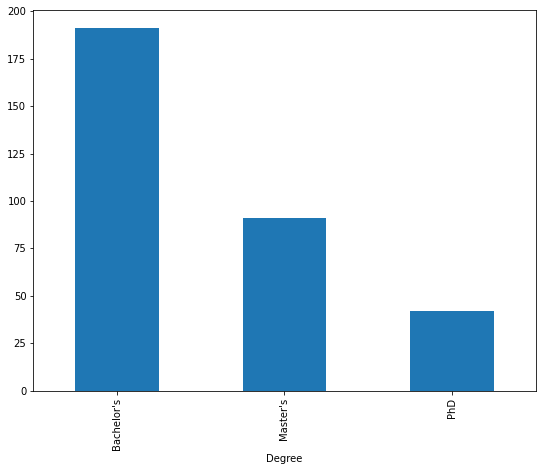

In [436]:
sal_data['Degree'].value_counts().plot(kind='bar',figsize=(9,7))
plt.show()

In [437]:
sal_data['Job_Title'].value_counts()

Job_Title
Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: count, Length: 174, dtype: int64

In [438]:
sal_data['Job_Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [439]:
sal_data['Gender'].value_counts()

Gender
Male      170
Female    154
Name: count, dtype: int64

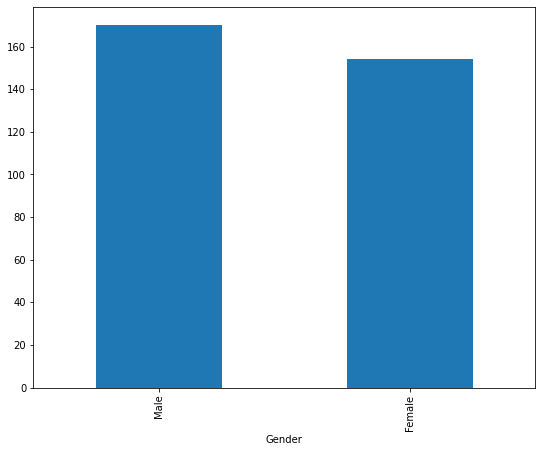

In [440]:
sal_data['Gender'].value_counts().plot(kind='bar',figsize=(9,7))
plt.show()

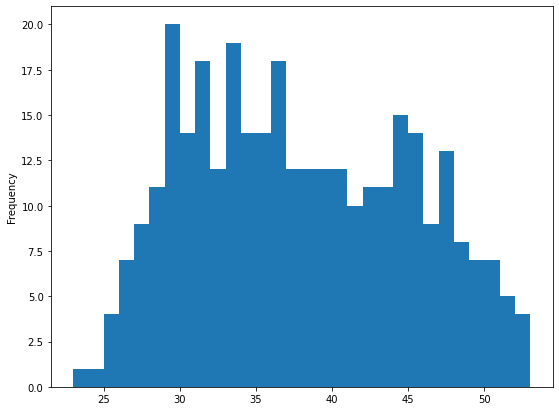

In [441]:
sal_data['Age'].plot(kind='hist',bins=30,figsize=(9,7))
plt.show()

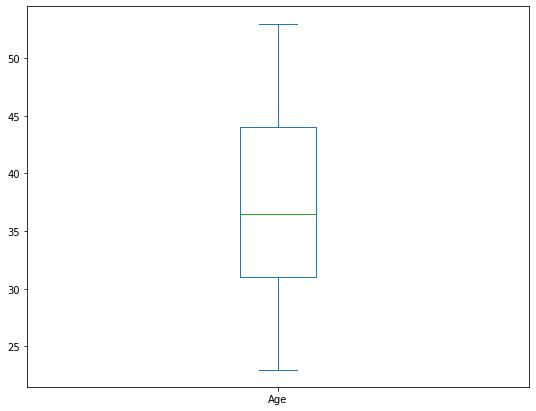

In [442]:
sal_data['Age'].plot(kind='box',figsize=(9,7))
plt.show()

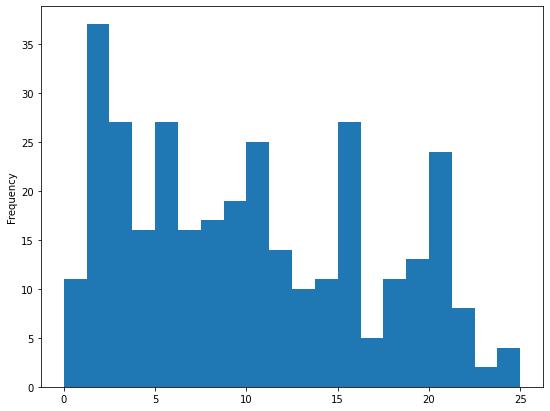

In [443]:
sal_data['Experience_year'].plot(kind='hist',bins=20,figsize=(9,7))
plt.show()

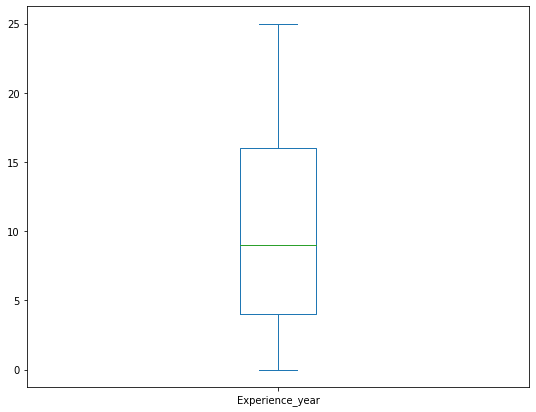

In [444]:
sal_data['Experience_year'].plot(kind='box',figsize=(9,7))
plt.show()

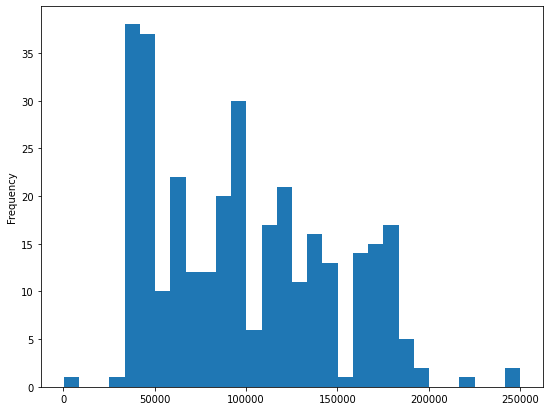

In [445]:
sal_data['Salary'].plot(kind='hist',bins=30,figsize=(9,7))
plt.show()

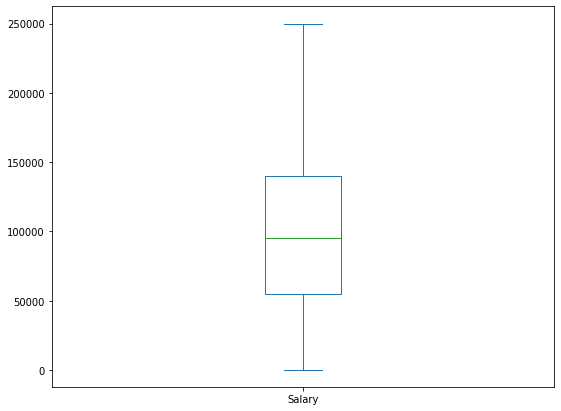

In [446]:
sal_data['Salary'].plot(kind='box',figsize=(9,7))
plt.show()

In [447]:
categorical_columns,numerical_columns=[],[]
for column in sal_data.columns:
    if sal_data[column].dtype=='object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [448]:
categorical_columns

['Gender', 'Degree', 'Job_Title']

In [449]:
numerical_columns

['Age', 'Experience_year', 'Salary']

In [450]:
categorical_columns2=['Gender','Degree']

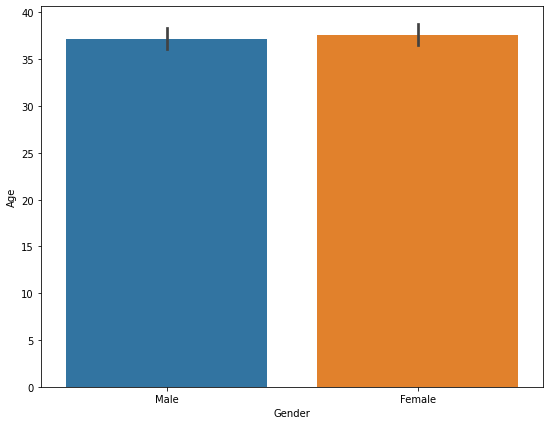

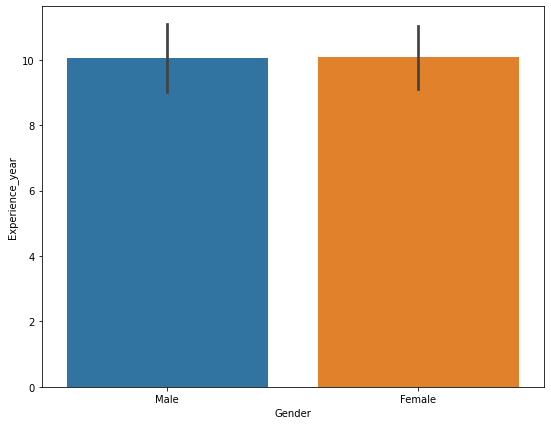

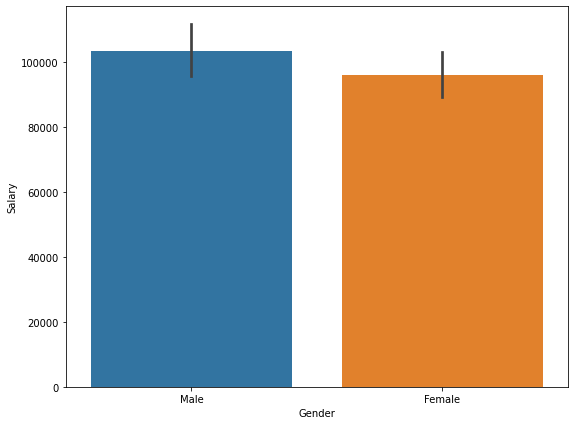

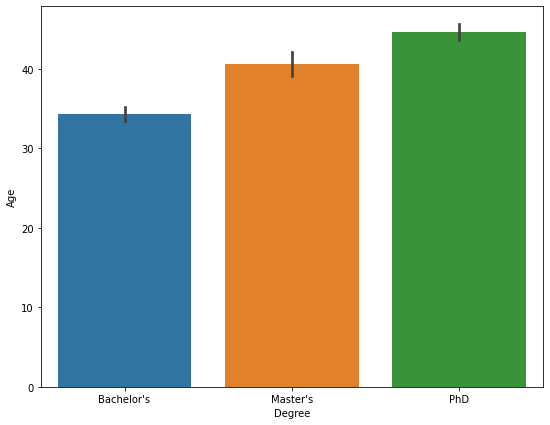

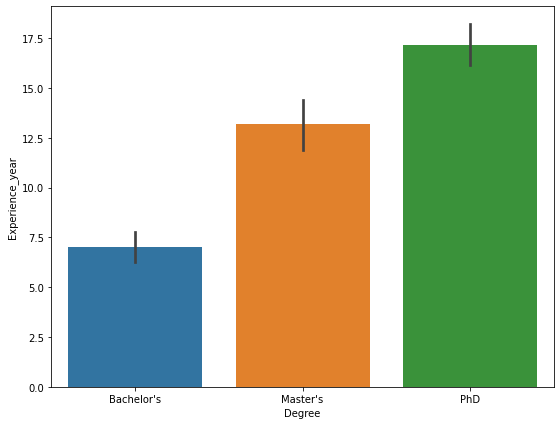

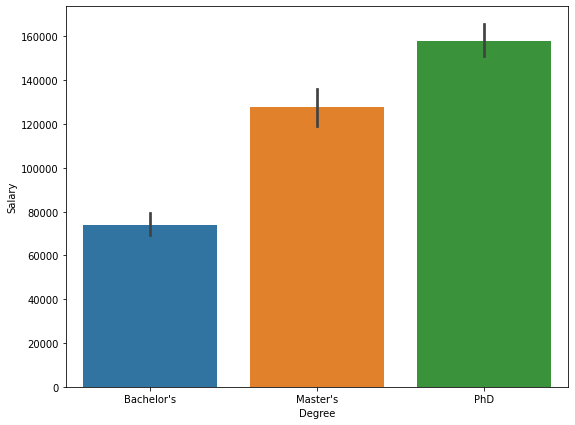

In [451]:
for i in categorical_columns2:
    for j in numerical_columns:
        plt.figure(figsize=(9,7))
        sns.barplot(data=sal_data,x=i,y=j)
        plt.show()

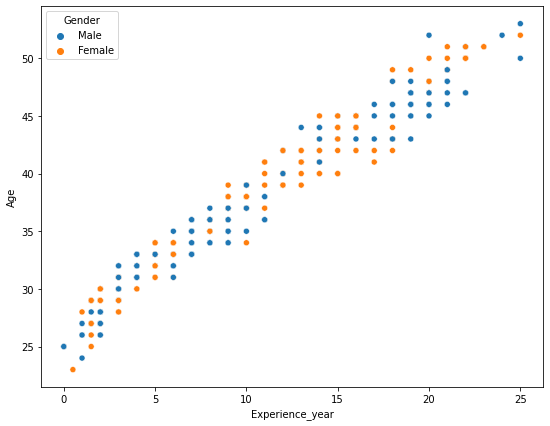

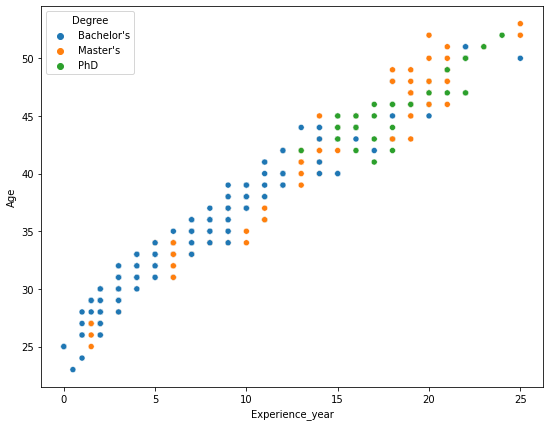

In [452]:
for i in categorical_columns2:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=sal_data,x='Experience_year',y='Age',hue=i)
    plt.show()

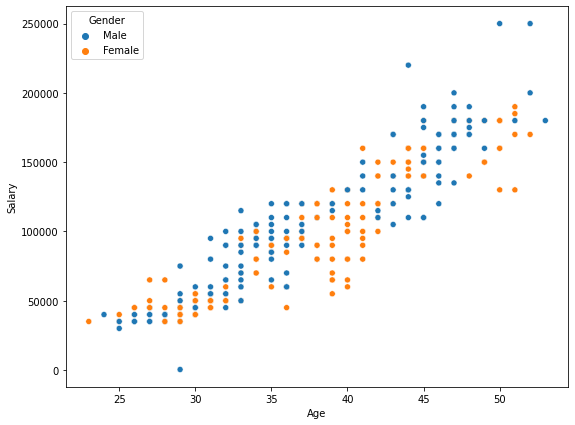

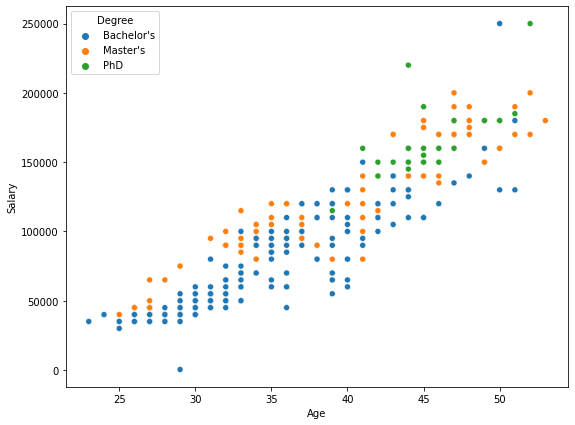

In [453]:
for i in categorical_columns2:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=sal_data,x='Age',y='Salary',hue=i)
    plt.show()

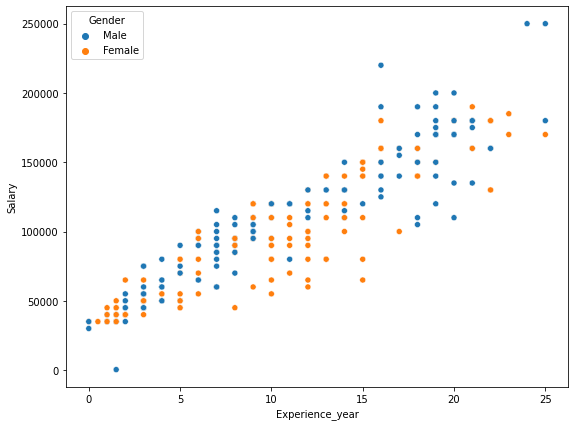

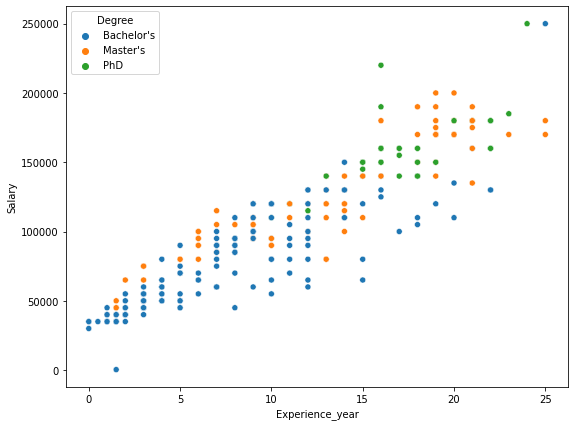

In [454]:
for i in categorical_columns2:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=sal_data,x='Experience_year',y='Salary',hue=i)
    plt.show()

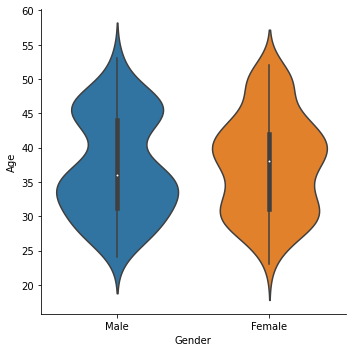

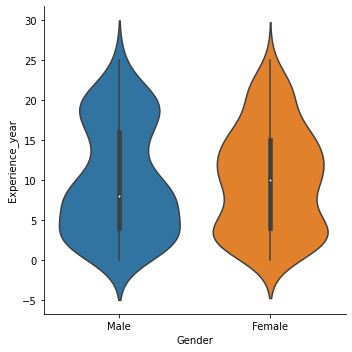

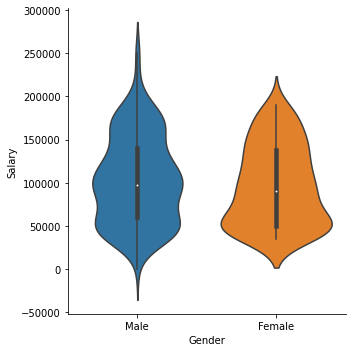

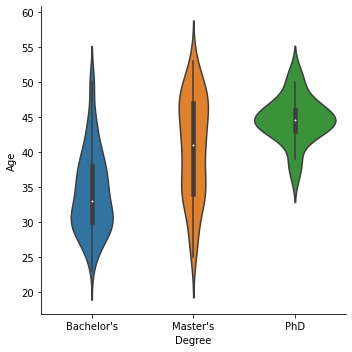

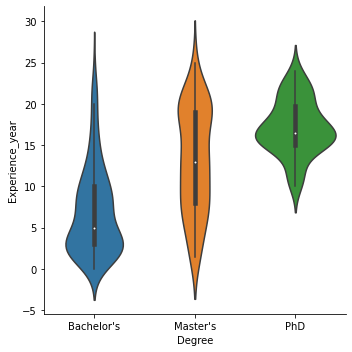

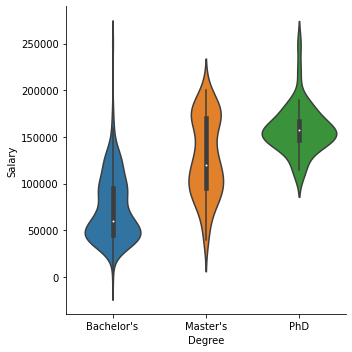

In [455]:
for i in categorical_columns2:
    for j in numerical_columns:
        sns.catplot(data=sal_data,x=i,y=j,kind='violin')
        plt.show()

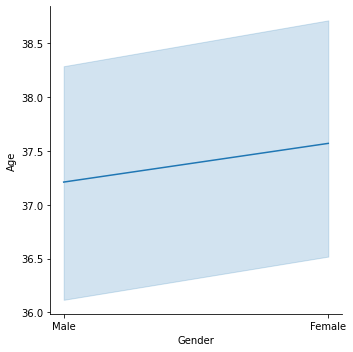

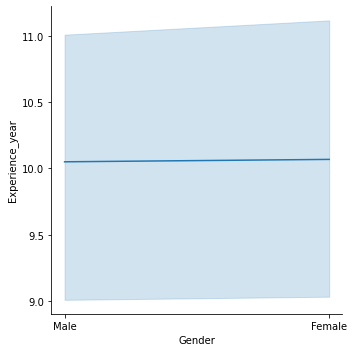

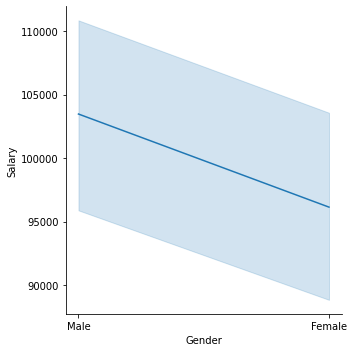

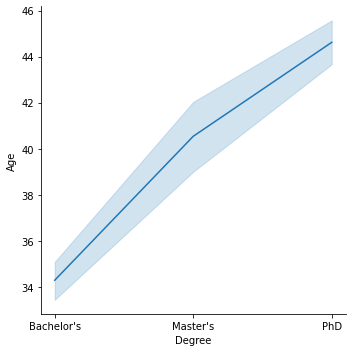

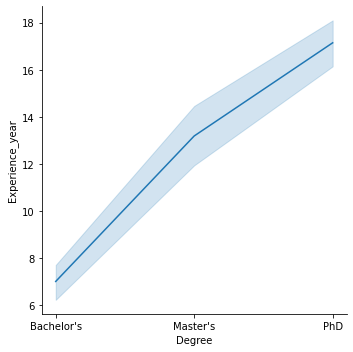

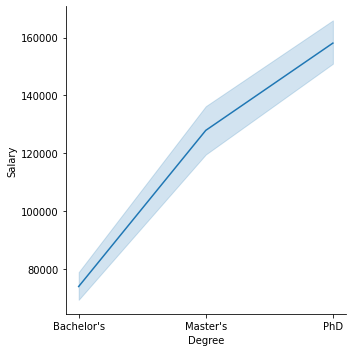

In [456]:
for i in categorical_columns2:
    for j in numerical_columns:
        sns.relplot(data=sal_data,x=i,y=j,kind='line')
        plt.show()

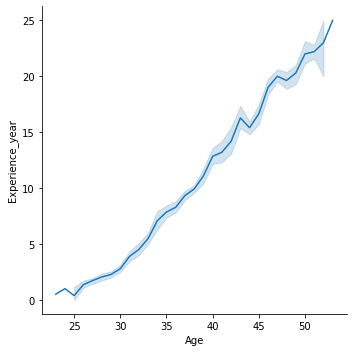

In [457]:
sns.relplot(data=sal_data,x='Age',y='Experience_year',kind='line')
plt.show()

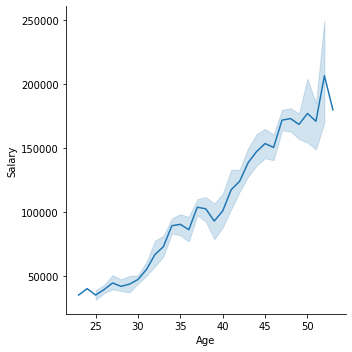

In [458]:
sns.relplot(data=sal_data,x='Age',y='Salary',kind='line')
plt.show()

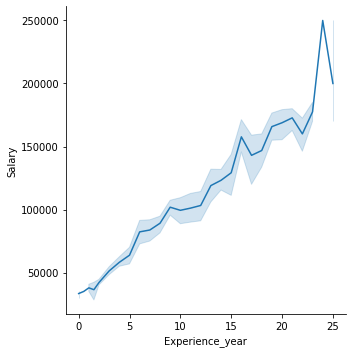

In [459]:
sns.relplot(data=sal_data,x='Experience_year',y='Salary',kind='line')
plt.show()

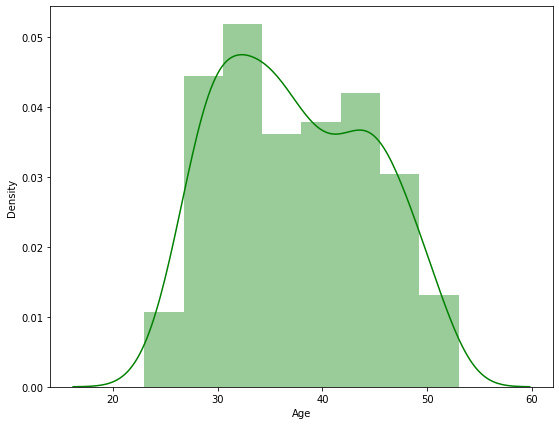

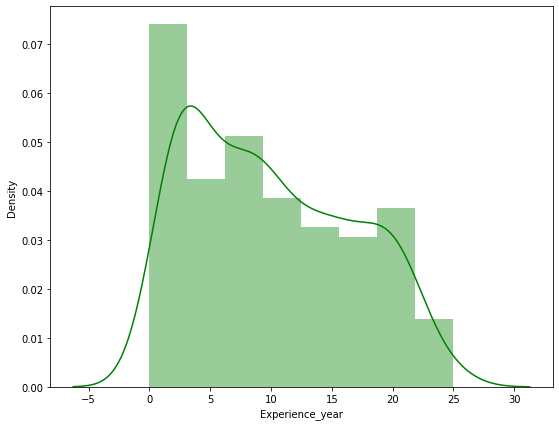

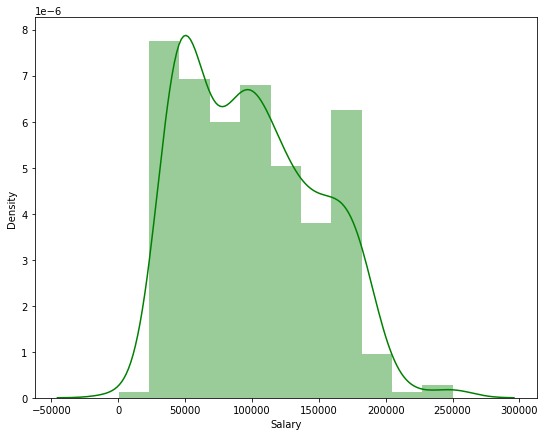

In [460]:
for i in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.distplot(sal_data[i],color='green')
    plt.show()

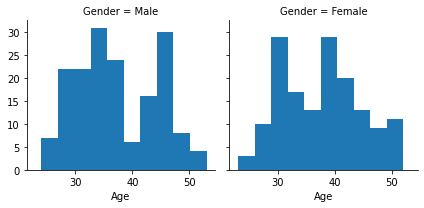

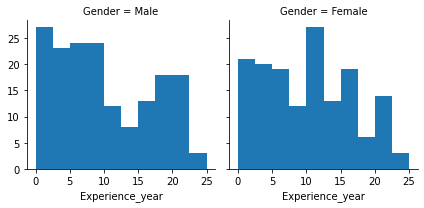

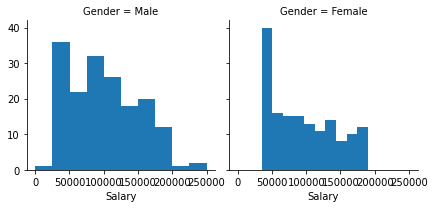

In [461]:
for i in numerical_columns:
    b=sns.FacetGrid(data=sal_data,col='Gender')
    b.map(plt.hist,i)

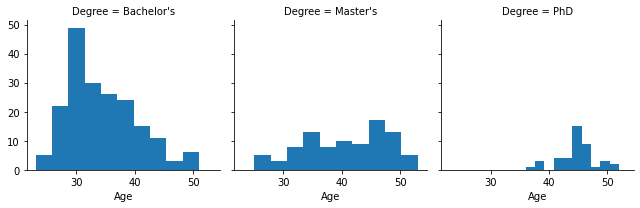

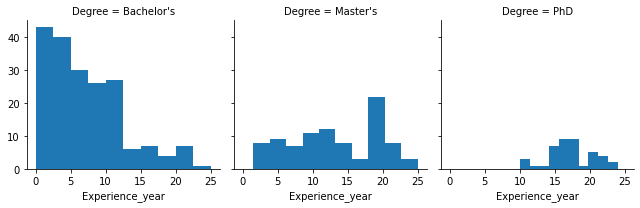

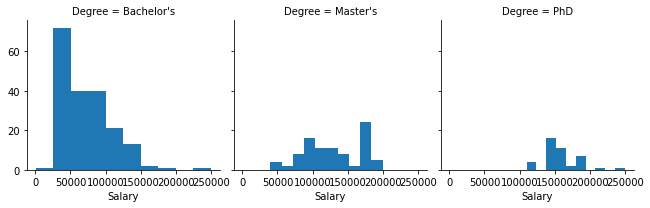

In [462]:
for i in numerical_columns:
    b=sns.FacetGrid(data=sal_data,col='Degree')
    b.map(plt.hist,i)

In [463]:
sal_data.sample(5)

,Age,Gender,Degree,Job_Title,Experience_year,Salary
170,50.0,Female,Master's,Director of Finance,20.0,180000.0
13,40.0,Female,Master's,Project Manager,14.0,130000.0
93,52.0,Female,Master's,Senior Marketing Manager,25.0,170000.0
283,29.0,Female,Bachelor's,Junior Business Development Associate,1.5,35000.0
70,33.0,Male,Bachelor's,Web Developer,6.0,65000.0


In [464]:
sal_data2=sal_data.copy()

In [465]:
sal_data2.head()

,Age,Gender,Degree,Job_Title,Experience_year,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [466]:
sal_data2=pd.get_dummies(data=sal_data2,columns=categorical_columns,drop_first=True,dtype='int')

In [467]:
sal_data2.head()

,Age,Experience_year,Salary,Gender_Male,Degree_Master's,Degree_PhD,Job_Title_Accountant,Job_Title_Administrative Assistant,Job_Title_Business Analyst,Job_Title_Business Development Manager,...,Job_Title_Supply Chain Manager,Job_Title_Technical Recruiter,Job_Title_Technical Support Specialist,Job_Title_Technical Writer,Job_Title_Training Specialist,Job_Title_UX Designer,Job_Title_UX Researcher,Job_Title_VP of Finance,Job_Title_VP of Operations,Job_Title_Web Developer
0,32.0,5.0,90000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,3.0,65000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,150000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,7.0,60000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,20.0,200000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [468]:
sal_data2.shape

(324, 179)

In [469]:
sal_data2.std().mean()

271.9541064998572

In [470]:
scaler=StandardScaler()

In [471]:
sal_data2['Age']=scaler.fit_transform(sal_data2[['Age']])
sal_data2['Experience_year']=scaler.fit_transform(sal_data2[['Experience_year']])

In [472]:
sal_data2.head()

,Age,Experience_year,Salary,Gender_Male,Degree_Master's,Degree_PhD,Job_Title_Accountant,Job_Title_Administrative Assistant,Job_Title_Business Analyst,Job_Title_Business Development Manager,...,Job_Title_Supply Chain Manager,Job_Title_Technical Recruiter,Job_Title_Technical Support Specialist,Job_Title_Technical Writer,Job_Title_Training Specialist,Job_Title_UX Designer,Job_Title_UX Researcher,Job_Title_VP of Finance,Job_Title_VP of Operations,Job_Title_Web Developer
0,-0.750231,-0.761821,90000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.307742,-1.063017,65000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.061680,0.744158,150000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.192720,-0.460625,60000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.037324,1.497148,200000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [473]:
X=sal_data2.drop(columns=['Salary'],axis=1)
y=sal_data2['Salary']

In [474]:
X.head()

,Age,Experience_year,Gender_Male,Degree_Master's,Degree_PhD,Job_Title_Accountant,Job_Title_Administrative Assistant,Job_Title_Business Analyst,Job_Title_Business Development Manager,Job_Title_Business Intelligence Analyst,...,Job_Title_Supply Chain Manager,Job_Title_Technical Recruiter,Job_Title_Technical Support Specialist,Job_Title_Technical Writer,Job_Title_Training Specialist,Job_Title_UX Designer,Job_Title_UX Researcher,Job_Title_VP of Finance,Job_Title_VP of Operations,Job_Title_Web Developer
0,-0.750231,-0.761821,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.307742,-1.063017,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.061680,0.744158,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.192720,-0.460625,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.037324,1.497148,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [475]:
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
348     35000.0
349    110000.0
350    160000.0
351     55000.0
371    170000.0
Name: Salary, Length: 324, dtype: float64

In [476]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [477]:
X_train.shape

(259, 178)

In [478]:
X_test.shape

(65, 178)

In [479]:
rf=RandomForestRegressor(max_features=9)
et=ExtraTreesRegressor(max_depth=15)
ls=Lasso(alpha=7)
sv=SVR(C=30000)

In [480]:
vr_model=VotingRegressor([('rf',rf),('et',et),('ls',ls),('sv',sv)],weights=[2,1,1,2])

In [481]:
vr_model.fit(X_train,y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(max_features=9)),
                            ('et', ExtraTreesRegressor(max_depth=15)),
                            ('ls', Lasso(alpha=7)), ('sv', SVR(C=30000))],
                weights=[2, 1, 1, 2])

In [482]:
y_pred_vr=vr_model.predict(X_test)

In [483]:
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred_vr))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_vr)))
print('R2 Score: ',r2_score(y_test,y_pred_vr))

Mean Absolute Error:  9575.97959044628
RMSE:  12729.66668996979
R2 Score:  0.9142525503880223


In [486]:
vr_model.estimators_

[RandomForestRegressor(max_features=9),
 ExtraTreesRegressor(max_depth=15),
 Lasso(alpha=7),
 SVR(C=30000)]

In [488]:
vr_model.n_features_in_

178

In [489]:
vr_model.named_estimators_

{'rf': RandomForestRegressor(max_features=9),
 'et': ExtraTreesRegressor(max_depth=15),
 'ls': Lasso(alpha=7),
 'sv': SVR(C=30000)}

In [490]:
vr_model.weights

[2, 1, 1, 2]